In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [2]:
usecols = ['Finding Labels', 'View Position', 'Patient Gender', 'path']
data = pd.read_csv('data.csv', usecols = usecols)
data.head()

,Finding Labels,Patient Gender,View Position,path
0,Cardiomegaly,M,PA,images_001/images/00000001_000.png
1,Cardiomegaly|Emphysema,M,PA,images_001/images/00000001_001.png
2,Cardiomegaly|Effusion,M,PA,images_001/images/00000001_002.png
3,No Finding,M,PA,images_001/images/00000002_000.png
4,Hernia,F,PA,images_001/images/00000003_000.png


In [3]:
data.groupby('View Position').count()

,Finding Labels,Patient Gender,path
View Position,,,
AP,44810,44810,44810
PA,67310,67310,67310


# Select only the PA views

In [4]:
data = data[data['View Position'] == 'PA'].drop('View Position', axis = 1)
data.head()

,Finding Labels,Patient Gender,path
0,Cardiomegaly,M,images_001/images/00000001_000.png
1,Cardiomegaly|Emphysema,M,images_001/images/00000001_001.png
2,Cardiomegaly|Effusion,M,images_001/images/00000001_002.png
3,No Finding,M,images_001/images/00000002_000.png
4,Hernia,F,images_001/images/00000003_000.png


In [5]:
data.groupby('Patient Gender').count()

,Finding Labels,path
Patient Gender,,
F,30167,30167
M,37143,37143


# Select only the Male Patients

In [6]:
data = data[data['Patient Gender'] == 'M'].drop('Patient Gender', axis = 1)
data.head()


,Finding Labels,path
0,Cardiomegaly,images_001/images/00000001_000.png
1,Cardiomegaly|Emphysema,images_001/images/00000001_001.png
2,Cardiomegaly|Effusion,images_001/images/00000001_002.png
3,No Finding,images_001/images/00000002_000.png
21,No Finding,images_001/images/00000006_000.png


In [7]:
labels = data['Finding Labels'].str.split('|')
labels

0                    [Cardiomegaly]
1         [Cardiomegaly, Emphysema]
2          [Cardiomegaly, Effusion]
3                      [No Finding]
21                     [No Finding]
                    ...            
112112                 [No Finding]
112114                 [No Finding]
112115            [Mass, Pneumonia]
112116                 [No Finding]
112119                 [No Finding]
Name: Finding Labels, Length: 37143, dtype: object

In [8]:
all_labels = set()
for i in labels:
    all_labels |= set(i)
all_labels

{'Atelectasis',
 'Cardiomegaly',
 'Consolidation',
 'Edema',
 'Effusion',
 'Emphysema',
 'Fibrosis',
 'Hernia',
 'Infiltration',
 'Mass',
 'No Finding',
 'Nodule',
 'Pleural_Thickening',
 'Pneumonia',
 'Pneumothorax'}

In [9]:
for label in all_labels:
    data[label] = 1*(data['Finding Labels'].str.contains(label))
data.head()

,Finding Labels,path,No Finding,Cardiomegaly,Atelectasis,Mass,Emphysema,Pneumonia,Pleural_Thickening,Pneumothorax,Infiltration,Nodule,Consolidation,Hernia,Effusion,Edema,Fibrosis
0,Cardiomegaly,images_001/images/00000001_000.png,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Cardiomegaly|Emphysema,images_001/images/00000001_001.png,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
2,Cardiomegaly|Effusion,images_001/images/00000001_002.png,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,No Finding,images_001/images/00000002_000.png,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21,No Finding,images_001/images/00000006_000.png,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Remove any patients with more than one finding

In [10]:
data['number_of_findings'] = data[all_labels].sum(axis = 1)
data.groupby('number_of_findings').count()['Finding Labels']

number_of_findings
1    31414
2     3997
3     1293
4      309
5       97
6       25
7        8
Name: Finding Labels, dtype: int64

In [11]:
data = data[data['number_of_findings'] == 1].drop('number_of_findings', axis = 1)
data

,Finding Labels,path,No Finding,Cardiomegaly,Atelectasis,Mass,Emphysema,Pneumonia,Pleural_Thickening,Pneumothorax,Infiltration,Nodule,Consolidation,Hernia,Effusion,Edema,Fibrosis
0,Cardiomegaly,images_001/images/00000001_000.png,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,No Finding,images_001/images/00000002_000.png,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21,No Finding,images_001/images/00000006_000.png,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22,No Finding,images_001/images/00000007_000.png,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26,Emphysema,images_001/images/00000009_000.png,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112111,No Finding,images_012/images/00030798_000.png,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
112112,No Finding,images_012/images/00030799_000.png,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
112114,No Finding,images_012/images/00030801_000.png,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
112116,No Finding,images_012/images/00030802_000.png,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
ordered_list_of_findings = data[all_labels].mean().sort_values(ascending = False)
ordered_list_of_findings

No Finding            0.687369
Infiltration          0.093048
Atelectasis           0.043961
Effusion              0.036226
Nodule                0.034029
Mass                  0.025912
Pneumothorax          0.019132
Pleural_Thickening    0.015694
Emphysema             0.011173
Fibrosis              0.010823
Cardiomegaly          0.010218
Consolidation         0.007003
Pneumonia             0.003565
Hernia                0.001114
Edema                 0.000732
dtype: float64

# Looking only at the top four finding (plus No Finding), make simplified dataframes and save as csv

In [13]:
csv_files = []
for finding in ordered_list_of_findings.index[1:5]:
    df = data[(data['No Finding'] + data[finding]) == 1]
    df = df.drop([f for f in ordered_list_of_findings.index if f!=finding], axis =1)
    df = df.drop('Finding Labels', axis = 1)
    csv_files.append(f'binary_data/{finding}.csv')
    df.to_csv(csv_files[-1], index = False)
csv_files

['binary_data/Infiltration.csv',
 'binary_data/Atelectasis.csv',
 'binary_data/Effusion.csv',
 'binary_data/Nodule.csv']

In [14]:
df = pd.read_csv(csv_files[1])
finding = df.columns[-1]
df['class'] = df.iloc[:,-1].map(lambda x:{0:'No Finding', 1:finding}[x])
df

,path,Atelectasis,class
0,images_001/images/00000002_000.png,0,No Finding
1,images_001/images/00000006_000.png,0,No Finding
2,images_001/images/00000007_000.png,0,No Finding
3,images_001/images/00000011_001.png,0,No Finding
4,images_001/images/00000011_002.png,0,No Finding
...,...,...,...
22969,images_012/images/00030798_000.png,0,No Finding
22970,images_012/images/00030799_000.png,0,No Finding
22971,images_012/images/00030801_000.png,0,No Finding
22972,images_012/images/00030802_000.png,0,No Finding


# Enforce Class Balance

In [15]:
df0 = df[df[finding]==0]
df1 = df[df[finding]==1]
smaller = min(len(df0), len(df1))
smaller
df = pd.concat([df0.iloc[:smaller],df1.iloc[:smaller]]).sample(frac=1)
df[finding].mean()

0.5

In [16]:
df

,path,Atelectasis,class
900,images_001/images/00001203_002.png,0,No Finding
451,images_001/images/00000654_000.png,0,No Finding
15772,images_009/images/00019007_000.png,1,Atelectasis
7042,images_004/images/00008865_002.png,1,Atelectasis
826,images_001/images/00001118_000.png,0,No Finding
...,...,...,...
20532,images_011/images/00026298_000.png,1,Atelectasis
12049,images_007/images/00014311_000.png,1,Atelectasis
963,images_001/images/00001255_000.png,0,No Finding
218,images_001/images/00000285_000.png,0,No Finding


In [17]:
# finding_weight = (1-df[finding].sum()/len(df)+.5)/2
# no_finding_weight = 1 - finding_weight
# finding_weight, no_finding_weight

In [18]:
# df['weight'] = df[finding].map(lambda x:{1:finding_weight, 0:no_finding_weight}[x])
# df

In [19]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df,test_size = 0.25)
print('train', train_df.shape[0], 'validation', test_df.shape[0])

train 2071 validation 691


In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
img_gen = ImageDataGenerator(samplewise_center=True, 
                              samplewise_std_normalization=True, 
                              height_shift_range= 0.05, 
                              width_shift_range=0.1, 
                              rotation_range=5, 
                              shear_range = 0.1,
                              fill_mode = 'constant',
                              zoom_range=0.15)

In [21]:
image_size = (128,128)

In [22]:
train_gen = img_gen.flow_from_dataframe(dataframe=train_df,
                                        x_col = 'path',
                                        y_col = 'class',
#                                         weight_col = 'weight',
                                        class_mode = 'categorical',
                                        target_size = image_size, 
                                        color_mode = 'grayscale',
                                        batch_size = 32)

Found 2071 validated image filenames belonging to 2 classes.


In [23]:
test_gen = img_gen.flow_from_dataframe(dataframe=test_df,
                                        x_col = 'path',
                                        y_col = 'class',
#                                         weight_col = 'weight',
                                        class_mode = 'categorical',
                                        target_size = image_size, 
                                        color_mode = 'grayscale',
                                        batch_size = 512)

Found 691 validated image filenames belonging to 2 classes.


In [24]:
test_X, test_Y = next(test_gen)

In [25]:
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
weight_path=f"{finding}_simplified_weights.best_2.hdf5"

checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='auto', save_weights_only = True)

early = EarlyStopping(monitor="val_loss", 
                      mode="auto", 
                      patience=200)
callbacks_list = [checkpoint, early]


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape=(128,128,1), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (4, 4), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (5, 5), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(32, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense((2), activation = 'softmax' ))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['binary_accuracy'])


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 16)      160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 16)        4112      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 16)          6

In [38]:
# try:
#     model.load_weights(weight_path)
# except:
#     pass
    
history = model.fit(
        train_gen,
        validation_data = (test_X, test_Y),
        steps_per_epoch=50,
        epochs=100,
        callbacks = callbacks_list)

Epoch 1/100
50/50 [==============================] - ETA: 0s - loss: 0.6154 - binary_accuracy: 0.6637
Epoch 00001: val_loss did not improve from 0.59962
50/50 [==============================] - 19s 373ms/step - loss: 0.6154 - binary_accuracy: 0.6637 - val_loss: 0.6024 - val_binary_accuracy: 0.6641
Epoch 2/100
50/50 [==============================] - ETA: 0s - loss: 0.6194 - binary_accuracy: 0.6650
Epoch 00002: val_loss did not improve from 0.59962
50/50 [==============================] - 18s 370ms/step - loss: 0.6194 - binary_accuracy: 0.6650 - val_loss: 0.6267 - val_binary_accuracy: 0.6797
Epoch 3/100
50/50 [==============================] - ETA: 0s - loss: 0.6128 - binary_accuracy: 0.6757
Epoch 00003: val_loss improved from 0.59962 to 0.59329, saving model to Atelectasis_simplified_weights.best_2.hdf5
50/50 [==============================] - 19s 374ms/step - loss: 0.6128 - binary_accuracy: 0.6757 - val_loss: 0.5933 - val_binary_accuracy: 0.6738
Epoch 4/100
50/50 [====================

Epoch 27/100
50/50 [==============================] - ETA: 0s - loss: 0.5700 - binary_accuracy: 0.7052
Epoch 00027: val_loss improved from 0.56385 to 0.55194, saving model to Atelectasis_simplified_weights.best_2.hdf5
50/50 [==============================] - 20s 401ms/step - loss: 0.5700 - binary_accuracy: 0.7052 - val_loss: 0.5519 - val_binary_accuracy: 0.7246
Epoch 28/100
50/50 [==============================] - ETA: 0s - loss: 0.5667 - binary_accuracy: 0.7190
Epoch 00028: val_loss improved from 0.55194 to 0.54943, saving model to Atelectasis_simplified_weights.best_2.hdf5
50/50 [==============================] - 20s 404ms/step - loss: 0.5667 - binary_accuracy: 0.7190 - val_loss: 0.5494 - val_binary_accuracy: 0.7344
Epoch 29/100
50/50 [==============================] - ETA: 0s - loss: 0.5540 - binary_accuracy: 0.7322
Epoch 00029: val_loss did not improve from 0.54943
50/50 [==============================] - 20s 399ms/step - loss: 0.5540 - binary_accuracy: 0.7322 - val_loss: 0.5562 - 

Epoch 53/100
50/50 [==============================] - ETA: 0s - loss: 0.4879 - binary_accuracy: 0.7718
Epoch 00053: val_loss did not improve from 0.53100
50/50 [==============================] - 21s 423ms/step - loss: 0.4879 - binary_accuracy: 0.7718 - val_loss: 0.5585 - val_binary_accuracy: 0.7305
Epoch 54/100
50/50 [==============================] - ETA: 0s - loss: 0.5355 - binary_accuracy: 0.7404
Epoch 00054: val_loss improved from 0.53100 to 0.52564, saving model to Atelectasis_simplified_weights.best_2.hdf5
50/50 [==============================] - 21s 425ms/step - loss: 0.5355 - binary_accuracy: 0.7404 - val_loss: 0.5256 - val_binary_accuracy: 0.7441
Epoch 55/100
50/50 [==============================] - ETA: 0s - loss: 0.5199 - binary_accuracy: 0.7461
Epoch 00055: val_loss did not improve from 0.52564
50/50 [==============================] - 21s 416ms/step - loss: 0.5199 - binary_accuracy: 0.7461 - val_loss: 0.5296 - val_binary_accuracy: 0.7480
Epoch 56/100
50/50 [================

50/50 [==============================] - ETA: 0s - loss: 0.4786 - binary_accuracy: 0.7605
Epoch 00079: val_loss did not improve from 0.51694
50/50 [==============================] - 20s 399ms/step - loss: 0.4786 - binary_accuracy: 0.7605 - val_loss: 0.5285 - val_binary_accuracy: 0.7441
Epoch 80/100
50/50 [==============================] - ETA: 0s - loss: 0.4702 - binary_accuracy: 0.7624
Epoch 00080: val_loss did not improve from 0.51694
50/50 [==============================] - 20s 402ms/step - loss: 0.4702 - binary_accuracy: 0.7624 - val_loss: 0.5266 - val_binary_accuracy: 0.7402
Epoch 81/100
50/50 [==============================] - ETA: 0s - loss: 0.4990 - binary_accuracy: 0.7580
Epoch 00081: val_loss did not improve from 0.51694
50/50 [==============================] - 20s 396ms/step - loss: 0.4990 - binary_accuracy: 0.7580 - val_loss: 0.5565 - val_binary_accuracy: 0.7266
Epoch 82/100
50/50 [==============================] - ETA: 0s - loss: 0.4721 - binary_accuracy: 0.7656
Epoch 0008

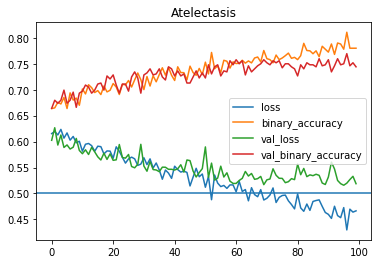

In [39]:
[plt.plot(history.history[i], label = i) for i in history.history.keys( )]
plt.title(finding)
plt.axhline(.5)
plt.legend()

In [29]:
model.save_weights(weight_path)

In [30]:
pred = model.predict(test_X).argmax(axis = 1)
true = test_Y.argmax(axis=1)

In [31]:
[(t, p) for t, p in zip(true, pred)]

[(0, 0),
 (1, 1),
 (0, 1),
 (1, 1),
 (1, 1),
 (0, 1),
 (1, 1),
 (1, 1),
 (1, 0),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (1, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 1),
 (1, 1),
 (0, 0),
 (0, 1),
 (0, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 1),
 (0, 0),
 (0, 0),
 (1, 0),
 (0, 0),
 (1, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 1),
 (1, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 0),
 (0, 1),
 (0, 0),
 

In [32]:
from sklearn.metrics import confusion_matrix

confusion_matrix(true, pred), np.array([['tn', 'fp'],['fn', 'tp']])

(array([[176,  70],
        [101, 165]]),
 array([['tn', 'fp'],
        ['fn', 'tp']], dtype='<U2'))

In [33]:
# plt.hist(predictions[test_Y == 0], alpha = .4)
# plt.hist(predictions[test_Y != 0], alpha = .4)
# plt.xlim([0,1])
# plt.axvline(predictions.mean())

In [34]:
# test_Y.mean()

In [35]:
# dir(model)

In [36]:
model.predict_classes(test_X)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,

In [37]:
np.min([predict for true, predict in zip(test_Y, model.predict(test_X)) if true ==0])

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
model.save(f'final_{finding}.tf')

In [ ]:
df.groupby('class').count()

In [ ]:
df.Effusion.mean()

In [ ]:
test_Y

In [ ]:
test_X.shape, test_Y

In [ ]:
train_X, train_Y, _ = next(train_gen)

In [ ]:
train_Y